![alt text](https://www.business.unsw.edu.au/style%20library/asb/assets/images/logo-unsw.png)

# MARK5828 Week 6: Multi-Channel Ad Effect

In this tutorial, we will be analyzing a data set describing 10,000 customers and
potential customers of a retailer. The retailer uses four different advertising channels.

1. **Display**
    - Display screens, website based displays.
2. **Social**
    - Social platforms, Facebook, Twitter, Instagram etc.
3. **Email**
    - Email Advertisments.
4. **Direct**
    - Mail Boxes.

Customer tracking begins when the customer is exposed to a display or social ad, visits the
retailer website or makes a purchase.

# Configure Package Dependencies

In [0]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats

# 1. Importing and Visualizing Datasets

We will be using three datasets in this tutorial namely: 
1. **Customer Data** <br>

2. **Impression Data** <br>
3. **Transaction Data** <br>

## 1.1 Customer Dataset

In [0]:
# read customer data, in which each row describes a customer.
cust = pd.read_csv("https://goo.gl/mqy8NR")
cust.head()

,id,past.purchase,email,direct
0,1,0,0,1
1,2,1,1,1
2,3,1,1,0
3,4,0,0,0
4,5,1,1,1


1. **id:** an id number for the customer.
2. **past purchase:** whether the customer has made a purchase prior to the observation period.
3. **email:** indicates whether the customer is eligible to receive emails, i.e. we have an email address and permission to mail.
4. **direct:** indicates whether the customer is eligible to receive direct mail, i.e. we have an address and permission to mail.

In [0]:
rows = cust.shape[0]
columns = cust.shape[1]
print("Number of row is ", rows)
print("Number of column is ", columns)

Number of row is  10000
Number of column is  4


In [0]:
# Display summary info of all numerical features.
cust.describe()

,id,past.purchase,email,direct
count,10000.00000,10000.00000,10000.000000,10000.000000
mean,5000.50000,0.50220,0.600100,0.497400
std,2886.89568,0.50002,0.489902,0.500018
min,1.00000,0.00000,0.000000,0.000000
25%,2500.75000,0.00000,0.000000,0.000000
50%,5000.50000,1.00000,1.000000,0.000000
75%,7500.25000,1.00000,1.000000,1.000000
max,10000.00000,1.00000,1.000000,1.000000


1. We have 10,000 customers and about half of those have made a purchase. 
2. About 60% are eligible for email and 50% are eligible for direct mail.

In [0]:
# Build cross table to have more inpection of customer data.
pd.crosstab(index=[cust["past.purchase"], cust["email"]], columns=cust["direct"])

direct                  0     1
past.purchase email            
0             0      2775   707
              1      1205   291
1             0        95   422
              1       951  3554

1. Most customers who have not made a purchase are not eligible for email or direct mail.
2. Customers who have made a purchase are more likely to be eligible.

## 1.2 Impression Dataset

In [0]:
# read impression data, in which each row in the file represents an exposure of one customer to an ad, i.e. an impression.
impress = pd.read_csv("https://goo.gl/74qIxy")
impress.head()

,id,date,channel,click
0,1,2017-01-06,direct,0
1,1,2017-02-03,direct,0
2,1,2017-01-01,social,0
3,1,2017-01-02,social,0
4,1,2017-01-05,social,0


1. **id:** id number for the customer.
2. **date:** date of impression. 
3. **channel:** channel of the ad exposure.
4. **click:** indicates whether the customer clicked on the ad.

In [0]:
# Change data type.
impress["date"] = pd.to_datetime(impress["date"])

In [0]:
rows = impress.shape[0]
columns = impress.shape[1]
print("Number of row is ", rows)
print("Number of column is ", columns)

Number of row is  501336
Number of column is  4


In [0]:
# Display summary info of all numerical features.
impress.describe()

,id,click
count,501336.000000,501336.000000
mean,4959.637768,0.018542
std,2887.109474,0.134902
min,1.000000,0.000000
25%,2467.000000,0.000000
50%,4940.000000,0.000000
75%,7454.000000,0.000000
max,10000.000000,1.000000


We have 501,336 impressions between 2016-12-31 to 2017-02-27. Overall click rate is 1.85%, which is reasonable.

In [0]:
impress["date"].describe()

count                  501336
unique                     59
top       2017-01-10 00:00:00
freq                    17281
first     2016-12-31 00:00:00
last      2017-02-27 00:00:00
Name: date, dtype: object

We have 501,336 impressions between 2016-12-31 to 2017-02-27. 

In [0]:
impress["channel"].value_counts()

social           227009
display          216371
email             38426
direct             9948
email.holdout      9582
Name: channel, dtype: int64

The majority of these impressions are social or display. 

### 1.2.1 Visualizing the Cadence for Impression data
Cadence is the timing of advertising impressions. It is useful to understand the cadence of your 
ads before you do any other analysis. Email and direct are often sent out to users on specific dates.

In [0]:
cadence = pd.crosstab(index=impress['date'], columns=impress['channel'])
cadence.head()

channel,direct,display,email,email.holdout,social
date,,,,,
2016-12-31,0,788,0,0,1610
2017-01-01,0,3786,0,0,7481
2017-01-02,0,3792,0,0,7416
2017-01-03,0,3656,4798,1203,7505
2017-01-04,0,3731,0,0,7648


In [0]:
cadence

channel,direct,display,email,email.holdout,social
date,,,,,
2016-12-31,0,788,0,0,1610
2017-01-01,0,3786,0,0,7481
2017-01-02,0,3792,0,0,7416
2017-01-03,0,3656,4798,1203,7505
2017-01-04,0,3731,0,0,7648
2017-01-05,0,3770,0,0,7620
2017-01-06,4974,3611,0,0,7614
2017-01-07,0,3719,0,0,7552
2017-01-08,0,3780,0,0,7504


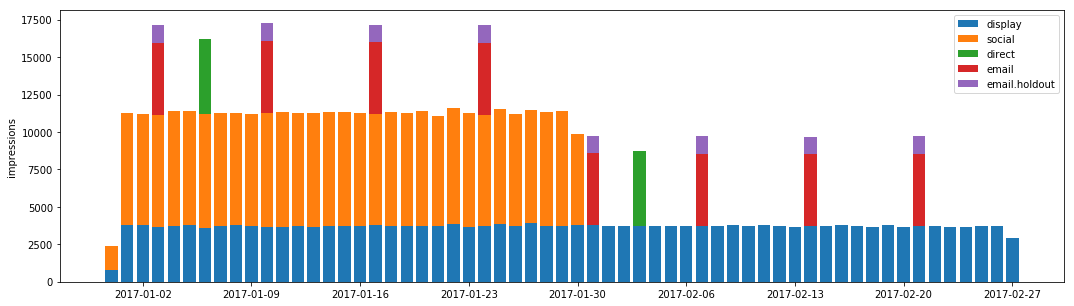

In [0]:
# Visualizing the cadence.
plt.figure(figsize=(18,5))
plt.bar(cadence.index, cadence['display'], label='display')
plt.bar(cadence.index, cadence['social'], bottom=cadence['display'], label='social')
plt.bar(cadence.index, cadence['direct'], 
        bottom=cadence['display']+cadence['social'], label='direct')
plt.bar(cadence.index, cadence['email'], 
        bottom=cadence['display']+cadence['social']+cadence['direct'], 
        label='email')
plt.bar(cadence.index, cadence['email.holdout'], 
        bottom=cadence['display']+cadence['social']+cadence['direct']+cadence['email'], 
        label='email.holdout')
plt.ylabel('impressions')
plt.legend()
plt.show()

1. Display impressions per day are steady across the observation window.
2. Social is steady in the first month and then stops.
3. Emails are sent once per week and each campaign seems to have a holdout.
4. Direct mail is sent once per month.

### 1.2.2 Histogram of Impressions
It is also useful to understand how many impressions each customer gets.

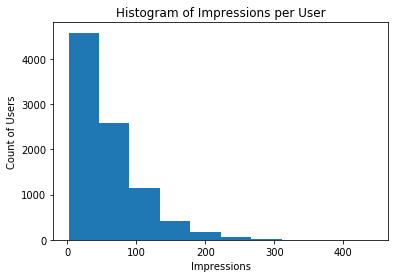

In [0]:
# Histogram of impressions.
plt.hist(impress.groupby('id').size())
plt.xlabel('Impressions')
plt.ylabel('Count of Users')
plt.title('Histogram of Impressions per User')
plt.show()

Some customers receive as many as 400 impressions in two months, but most get less than 100 impressions.

### 1.2.3 Click through rates by channel.

In [0]:
(impress.groupby(['click', 'channel']).size()[1]/impress.groupby(['channel']).size()).fillna(0)

channel
direct           0.000000
display          0.004783
email            0.099672
email.holdout    0.000000
social           0.019519
dtype: float64

The click through rates are highest for email at **10.0%** and lowest for display at **0.5%**. As expected, there are no clicks for direct or email holdouts.

## 1.3 Transactions Dataset

In [0]:
# read impression data, in which
trans = pd.read_csv("https://goo.gl/lIAuZu",index_col=0)
trans.head()

,id,date,last.touch,last.click
1,2,2017-01-04,email,none
2,2,2017-02-12,email,none
3,3,2017-02-02,email,none
4,3,2017-02-14,email,none
5,5,2017-01-04,display,email


1. **id:** id number for the customer
2. **date:** date of transactions.
3. **last.touch:** channel of the last ad impression the customer saw before the transaction
4. **last.click:** channel of the last ad the customer clicked before the transaction

In [0]:
# Change data type.
trans['date'] = pd.to_datetime(trans['date'])

In [0]:
rows = trans.shape[0]
columns = trans.shape[1]
print("Number of row is ", rows)
print("Number of column is ", columns)

Number of row is  22433
Number of column is  4


In [0]:
# Display summary info of all numerical features.
trans.describe()

,id
count,22433.000000
mean,4985.225516
std,2885.899132
min,2.000000
25%,2472.000000
50%,5005.000000
75%,7483.000000
max,10000.000000


The transactions span the same dates and customer ids as the impressions. It looks like some customers such as **id=1** do not have transactions.

In [0]:
trans["date"].describe()

count                   22433
unique                     59
top       2017-01-10 00:00:00
freq                      660
first     2017-01-01 00:00:00
last      2017-02-28 00:00:00
Name: date, dtype: object

In [0]:
trans["last.touch"].value_counts()

email      7145
social     6596
display    5252
direct     2594
none        846
Name: last.touch, dtype: int64

In [0]:
trans["last.click"].value_counts()

none       12998
social      4393
email       4151
display      891
Name: last.click, dtype: int64

In [0]:
# Transactions over time.
transbyday = trans.groupby(["date"]).size()
transbyday.head()

date
2017-01-01    325
2017-01-02    357
2017-01-03    589
2017-01-04    479
2017-01-05    403
dtype: int64

### 1.3.1 Transactions over time

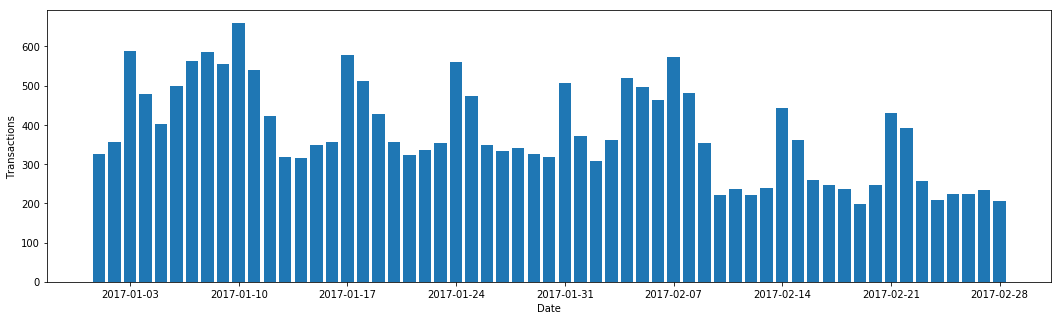

In [0]:
plt.figure(figsize=(18,5))
plt.bar(transbyday.index, transbyday)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()

Transactions appear to be a bit higher in the first month and there are clear spikes around the
time of emails and direct mail.

### 1.3.2 Histogram of transactions.

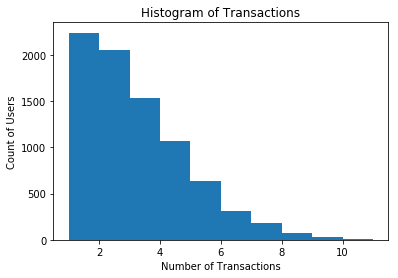

In [0]:
plt.hist(trans.groupby('id').size())
plt.xlabel('Number of Transactions')
plt.ylabel('Count of Users')
plt.title('Histogram of Transactions')
plt.show()

Most customers have less than 2 transactions in the two month observation period.

## 1.4 Randomly Analysing Customers

### 1.4.1 Customer 100

In [0]:
cust[cust['id'] == 100]

,id,past.purchase,email,direct
99,100,0,0,0


In [0]:
impress[impress['id'] == 100]

,id,date,channel,click


In [0]:
trans[trans['id'] == 100]

,id,date,last.touch,last.click
206,100,2017-01-18,none,none
207,100,2017-01-26,none,none


Here we see that the Customer No. 100 has no impressions and made two transactions.

### 1.4.2 Customer 300

In [0]:
cust[cust['id'] == 300]

,id,past.purchase,email,direct
299,300,1,1,1


In [0]:
impress[impress['id'] == 300].describe()

,id,click
count,91.0,91.0
mean,300.0,0.0
std,0.0,0.0
min,300.0,0.0
25%,300.0,0.0
50%,300.0,0.0
75%,300.0,0.0
max,300.0,0.0


In [0]:
impress[impress['id'] == 300]["channel"].value_counts()

display    81
email       8
direct      2
Name: channel, dtype: int64

In [0]:
impress[impress['id'] == 300]["date"].describe()

count                      91
unique                     48
top       2017-01-09 00:00:00
freq                        4
first     2016-12-31 00:00:00
last      2017-02-26 00:00:00
Name: date, dtype: object

In [0]:
trans[trans['id'] == 300]

,id,date,last.touch,last.click
647,300,2017-01-03,display,none
648,300,2017-01-10,email,none
649,300,2017-02-04,direct,none
650,300,2017-02-19,display,none


Customer No. 300 had 8 email, 2 direct mail and 81 display impressions and made 4 transactions.

# 2. Attribution rules

## 2.1 Last Touch Attribute
Last-click (or last-touch) attribution looks backward from each conversion to find the last ad the user clicked on prior to the conversion. The last click and the last touch are stored in the transaction file.

In [0]:
trans.head()

,id,date,last.touch,last.click
1,2,2017-01-04,email,none
2,2,2017-02-12,email,none
3,3,2017-02-02,email,none
4,3,2017-02-14,email,none
5,5,2017-01-04,display,email


We want to compute the number of transactions that are attributed to each channel by last touch, we just do a quick analysis on the transaction table. When we do this, we are ignoring all the customers who didn’t transact.

In [0]:
last_touch = trans.groupby('last.touch').size()
last_touch

last.touch
direct     2594
display    5252
email      7145
none        846
social     6596
dtype: int64

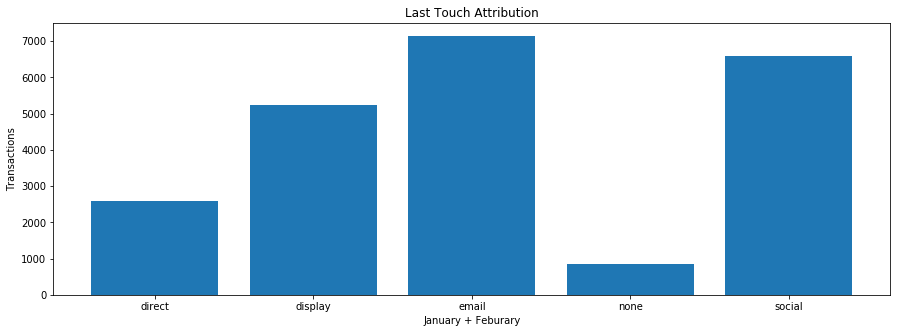

In [0]:
plt.figure(figsize=(15,5))
plt.bar(last_touch.index, last_touch)
plt.xlabel('January + Feburary')
plt.ylabel('Transactions')
plt.title('Last Touch Attribution')
plt.show()

We can interpret this as the incremental sales for **social** are **6596**, which is somehow **Mis-leading**.

## 2.2 Last Touch for sub-group of Transactions (e.g., Feburary Onwards...) 

In [0]:
last_touch_after = trans[trans['date'] > pd.Timestamp('2017-01-31')].groupby('last.touch').size()
last_touch_after

last.touch
direct     1669
display    2682
email      4081
none        258
social      328
dtype: int64

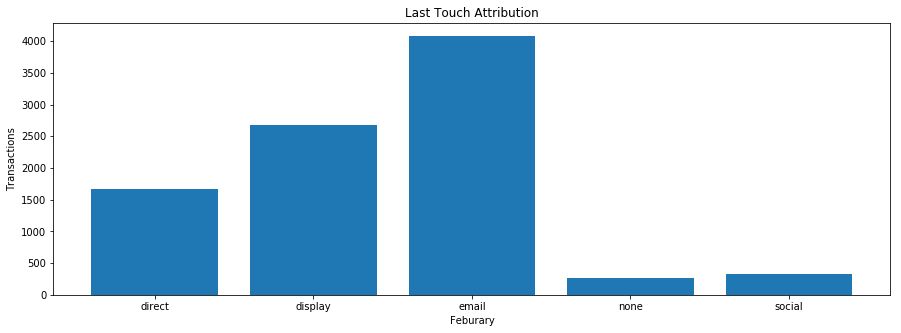

In [0]:
plt.figure(figsize=(15,5))
plt.bar(last_touch_after.index, last_touch_after)
plt.xlabel('Feburary')
plt.ylabel('Transactions')
plt.title('Last Touch Attribution')
plt.show()

In **February**, there were far fewer sales attributed to **social**, most likely because we ended the social ads at the end of **January**.

## 2.3 Analyzing Last Ad a Customer clicked, rather than Last Touch

In [0]:
last_click = trans.groupby('last.click').size()
last_click

last.click
display      891
email       4151
none       12998
social      4393
dtype: int64

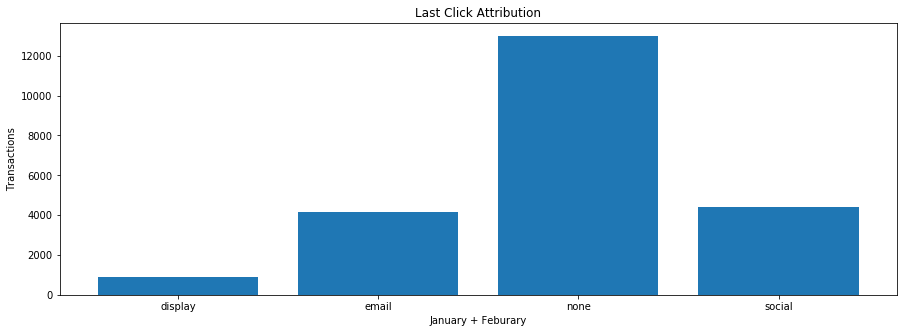

In [0]:
plt.figure(figsize=(15,5))
plt.bar(last_click.index, last_click)
plt.xlabel('January + Feburary')
plt.ylabel('Transactions')
plt.title('Last Click Attribution')
plt.show()

Since people don’t click very much, the attributed sales are much lower. Measuring ad performance based on clicks doesn’t make much sense for the advertiser.

# 3. Holdout Testing

The gold standard for measuring incremental sales is an experiment, where we randomly assign customers to be exposed or not exposed to an ad. For example, with email we can take our list of target emails and randomly select a set of them to not receive an email. The magic behind a holdout test is the randomization. Another name for holdout testing is **Randomized Controlled Trial.**

## 3.1 Analysing Holdout Group
There was an **email** on **2017-01-03** that included a holdout group. Let’s analyze this test.

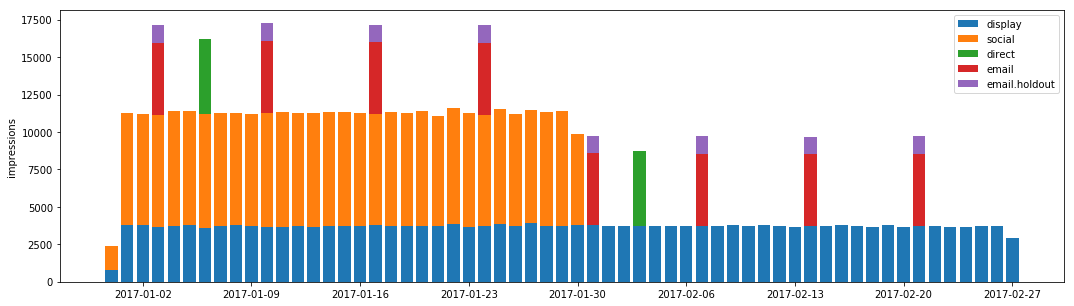

In [0]:
# Visualizing the cadence.
plt.figure(figsize=(18,5))
plt.bar(cadence.index, cadence['display'], label='display')
plt.bar(cadence.index, cadence['social'], bottom=cadence['display'], label='social')
plt.bar(cadence.index, cadence['direct'], 
        bottom=cadence['display']+cadence['social'], label='direct')
plt.bar(cadence.index, cadence['email'], 
        bottom=cadence['display']+cadence['social']+cadence['direct'], 
        label='email')
plt.bar(cadence.index, cadence['email.holdout'], 
        bottom=cadence['display']+cadence['social']+cadence['direct']+cadence['email'], 
        label='email.holdout')
plt.ylabel('impressions')
plt.legend()
plt.show()

In [0]:
def diffprop(obs):
    """
    `obs` must be a 2x2 numpy array.

    Returns:
    delta
        The difference in proportions
    ci
        The Wald 95% confidence interval for delta
    corrected_ci
        Yates continuity correction for the 95% confidence interval of delta.
    """
    n1, n2 = obs.sum(axis=1)
    prop1 = obs[0,0] / n1
    prop2 = obs[1,0] / n2
    delta = prop1 - prop2

    # Wald 95% confidence interval for delta
    se = np.sqrt(prop1*(1 - prop1)/n1 + prop2*(1 - prop2)/n2)
    ci = (delta - 1.96*se, delta + 1.96*se)

    # Yates continuity correction for confidence interval of delta
    correction = 0.5*(1/n1 + 1/n2)
    corrected_ci = (-(ci[0] - correction), -(ci[1] + correction))

    return -delta, corrected_ci

In [0]:
def holdout_test(date, window, impress, trans, delay=0):
    """Function for pulling relavent test summaries out of the data"""
    test_ids = impress[(impress['channel'] == "email") & 
        (impress['date'] == date)]['id'].unique()
    control_ids = impress[(impress['channel'] == "email.holdout") & 
        (impress['date'] == date)]['id'].unique()
    tdata = pd.DataFrame(np.concatenate((test_ids, control_ids), axis=0), columns=['id'])
    test_index_of_tdata = tdata[tdata['id'].isin(test_ids)].index
    tdata.loc[test_index_of_tdata,'group'] = 'test'
    control_index_of_tdata = tdata[~tdata['id'].isin(test_ids)].index
    tdata.loc[control_index_of_tdata, 'group'] = 'control'
    in_window = (trans['date'] >= date + pd.Timedelta(delay, unit='D')) & \
        (trans['date'] < date + pd.Timedelta(delay+window, unit='D'))
    tdata['convert'] = tdata['id'].isin(trans[in_window].id)
    ttable = pd.crosstab(tdata['group'], tdata['convert'])
    mosaic(tdata, ['group', 'convert'], title='Email Test on '+date.strftime('%Y-%m-%d'))
    x_squared, p, dof, expected = stats.chi2_contingency(np.concatenate(([ttable[True].values], 
                    [ttable[False].values]), axis=0))
    diff_conv = diffprop(np.concatenate(([ttable[True].values], [ttable[False].values]), axis=0).T)    
    return diff_conv, ttable, (x_squared, p)

## 3.2 Getting Conversion Estimates for Control and Test Groups after 7 days

Diff_Conv =  (0.059727712814670264, (0.09011809838195196, 0.029337327247388568))
TTable = 
 convert  False  True 
group                
control    810    393
test      2944   1854
X-Squared =  14.394981383825723
P-Value =  0.00014819674528967867
Conversion rate for Control Group =  32.66832917705736 -%
Conversion rate for Test Group =  38.641100458524384 -%


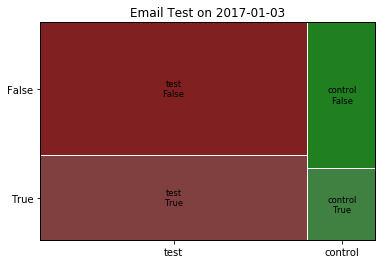

In [0]:
diff_conv, ttable, (x_squared, p) = holdout_test(pd.Timestamp('2017-01-03'), window=7, impress=impress, trans=trans)

print("Diff_Conv = ", diff_conv)
print("TTable = \n",ttable)
print("X-Squared = ", x_squared)
print("P-Value = ",p)

Control_group = (ttable[1][0])/(ttable[1][0]+ttable[0][0])
Test_group = (ttable[1][1])/(ttable[1][1]+ttable[0][1])
print("Conversion rate for Control Group = ", Control_group*100,'-%')
print("Conversion rate for Test Group = ", Test_group*100,'-%')

The email on **2017-01-03** produced incremental sales. The incremental increase in conversion rate is between **+2.9% and +9.0% (95% CI)**.

## 3.2 Getting Conversion Estimates for Control and Test Groups after 3 days

Diff_Conv =  (0.08120659862085788, (0.10306467606569693, 0.05934852117601883))
TTable = 
 convert  False  True 
group                
control   1063    140
test      3850    948
X-Squared =  42.18697654639043
P-Value =  8.295059177052017e-11
Conversion rate for Control Group =  11.637572734829593 -%
Conversion rate for Test Group =  19.75823259691538 -%


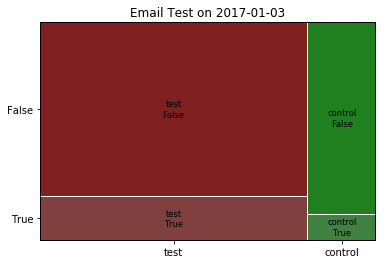

In [0]:
diff_conv, ttable, (x_squared, p) = holdout_test(pd.Timestamp('2017-01-03'), window=3, impress=impress, trans=trans)

print("Diff_Conv = ", diff_conv)
print("TTable = \n",ttable)
print("X-Squared = ", x_squared)
print("P-Value = ",p)

Control_group = (ttable[1][0])/(ttable[1][0]+ttable[0][0])
Test_group = (ttable[1][1])/(ttable[1][1]+ttable[0][1])
print("Conversion rate for Control Group = ", Control_group*100,'-%')
print("Conversion rate for Test Group = ", Test_group*100,'-%')

## 3.3 Getting Conversion Estimates over Time

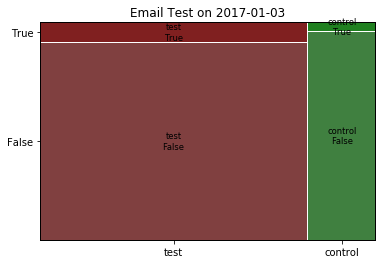

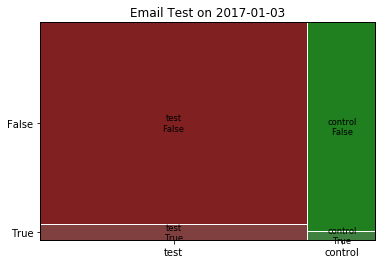

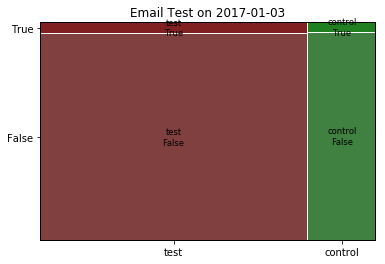

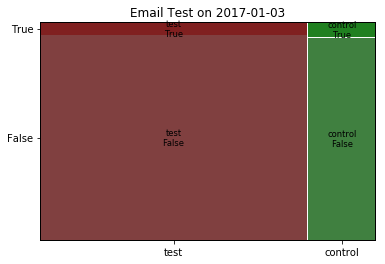

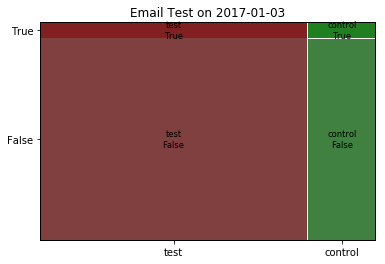

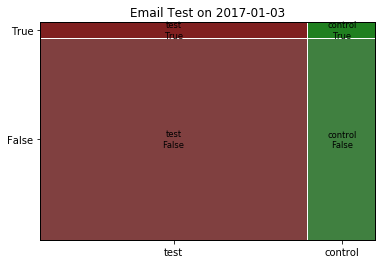

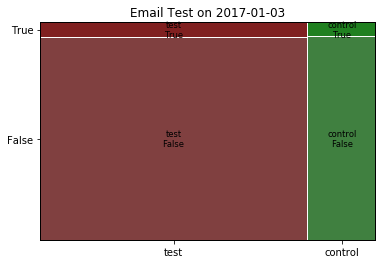

In [0]:
day1 = holdout_test(pd.Timestamp('2017-01-03'), window=1, 
                    impress=impress, trans=trans, delay=0)
day2 = holdout_test(pd.Timestamp('2017-01-03'), window=1, 
                    impress=impress, trans=trans, delay=1)
day3 = holdout_test(pd.Timestamp('2017-01-03'), window=1, 
                    impress=impress, trans=trans, delay=2)
day4 = holdout_test(pd.Timestamp('2017-01-03'), window=1, 
                    impress=impress, trans=trans, delay=3)
day5 = holdout_test(pd.Timestamp('2017-01-03'), window=1, 
                    impress=impress, trans=trans, delay=4)
day6 = holdout_test(pd.Timestamp('2017-01-03'), window=1, 
                    impress=impress, trans=trans, delay=5)
day7 = holdout_test(pd.Timestamp('2017-01-03'), window=1, 
                    impress=impress, trans=trans, delay=6)

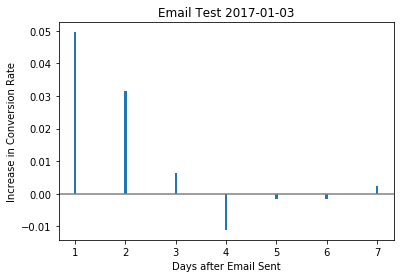

In [0]:
incr = [day1[0][0], day2[0][0],day3[0][0],day4[0][0],day5[0][0],day6[0][0],day7[0][0]]
plt.bar(range(1, 8), incr , width=0.05)
plt.xlabel('Days after Email Sent')
plt.ylabel('Increase in Conversion Rate')
plt.title('Email Test 2017-01-03')
plt.axhline(0, color='gray')
plt.show()

In the test on **2017-01-03**, the lift in conversion rate falls to zero in about **three** days.

# 4. Marketing mix modeling

Before advertisers had access to user-level ad exposure data (like our example data set) they only had data on what they had spend on advertising and (sometimes) the number of people who saw the ad. This type of spending data is similar to the aggregate **impressions data** we looked at for our data set.

**Based on this data, we want to find the correlation between total sales in each day/week/month to advertising spending or impressions on that same day/week/month, you estimate regression model.**

**For Example**,

$sales_t = β_0 + β_1*display_t + β_2*social_t + β_3*email_t + β_4*direct_t + \epsilon_t$

Here, $β's$ represent the unknown relationship between ad impressions and sales. For example $β_1$ is the increase in sales we get for each additional display impression.

## 4.1 Aggregate Transaction for each day.

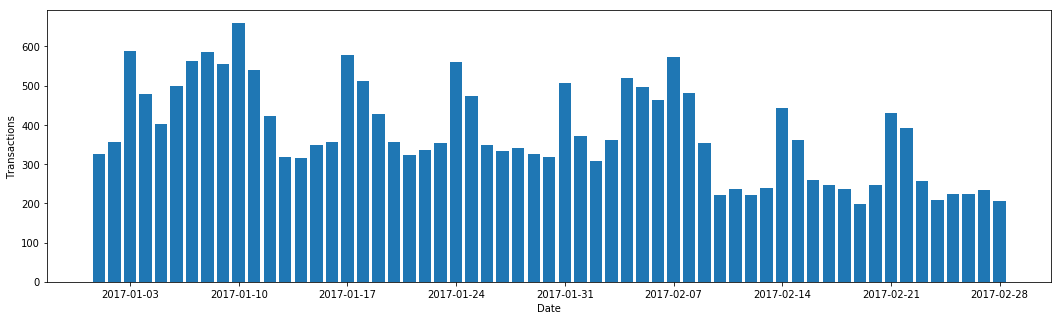

In [0]:
# Transactions over time.
transbyday = trans.groupby(["date"]).size()
plt.figure(figsize=(18,5))
plt.bar(transbyday.index, transbyday)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()

## 4.2 Aggregate number of impressions on each day + Transactions

In [0]:
# aligining dates
mdata = pd.concat([transbyday[0:56], cadence[1:57]], axis=1)
mdata["trans"] = mdata[0].values
mdata = mdata.drop([0],axis=1)
mdata.head()

,direct,display,email,email.holdout,social,trans
date,,,,,,
2017-01-01,0,3786,0,0,7481,325
2017-01-02,0,3792,0,0,7416,357
2017-01-03,0,3656,4798,1203,7505,589
2017-01-04,0,3731,0,0,7648,479
2017-01-05,0,3770,0,0,7620,403


## 4.3 Daily Impressions vs Transactions Plots

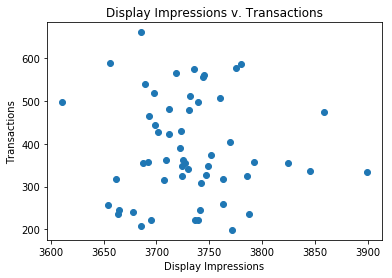

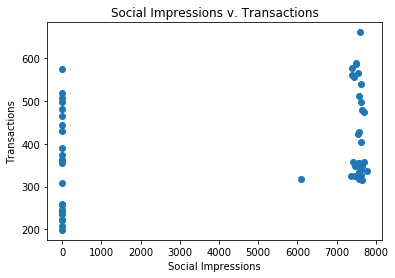

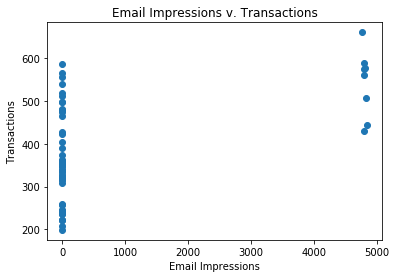

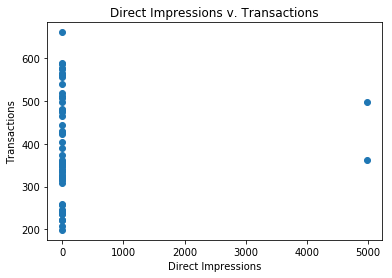

In [0]:
# Data exploration.
# Fig.1~Display Impressions v. Transactions
plt.scatter(mdata["display"], mdata["trans"])
plt.xlabel("Display Impressions")
plt.ylabel("Transactions")
plt.title("Display Impressions v. Transactions")
plt.show()

# Fig.2~Social Impressions v. Transactions
plt.scatter(mdata["social"], mdata["trans"])
plt.xlabel("Social Impressions")
plt.ylabel("Transactions")
plt.title("Social Impressions v. Transactions")
plt.show()

# Fig.3~Email Impressions v. Transactions
plt.scatter(mdata["email"], mdata["trans"])
plt.xlabel("Email Impressions")
plt.ylabel("Transactions")
plt.title("Email Impressions v. Transactions")
plt.show()

# Fig.4~Direct Impressions v. Transactions
plt.scatter(mdata["direct"], mdata["trans"])
plt.xlabel("Direct Impressions")
plt.ylabel("Transactions")
plt.title("Direct Impressions v. Transactions")
plt.show()

## 4.4 Running a simple media mix model.

In [0]:
mdata.rename(columns={"email.holdout":"email_holdout"},inplace=True)
m1 = smf.ols("trans~direct+social+email+display+social+email_holdout",data=mdata).fit()
mdata.rename(columns={"email_holdout":"email.holdout"},inplace=True)
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trans   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     8.368
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           8.34e-06
Time:                        21:45:17   Log-Likelihood:                -329.90
No. Observations:                  56   AIC:                             671.8
Df Residuals:                      50   BIC:                             684.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       477.4381    942.757      0.506      0.615   -1416.146    2371.022
direct            0.0140      0.014      1.009      0.318      -0.014       0.042
social            0.0122      0.003      3.579      0.001       0.005       0.019
email            -0.1694      0.322     -0.526      0.601      -0.817       0.478
display          -0.0448      0.253     -0.177      0.860      -0.553       0.463
email_holdout     0.8349      1.292      0.646      0.521      -1.761       3.430
==============================================================================
Omnibus:                        7.181   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.443
Skew:                           0.867   Prob(JB):                       0.0242
Kurtosis:                       2.574   Cond. No.                     4.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. The only statistically significant effect is for **social impressions**, and we get **0.0122** additional transactions for each **social impressions**.
2. The standard error for **display** is very large, which means we don’t have a precise estimate of the effect of **display**. This happened because daily **display** impressions are pretty much the same every day. The data is not informative!

# 5. Model-based attribution

Model-based attribution is similar to marketing mix modeling, but we do the analysis at the user-level, relating a user’s transactions or conversions to her prior advertising exposures. A simple attribution model is:

$y_{it} = β_0 + β_1*display_{it} + β_2*social_{it} + β_3*email_{it} + β_4*direct_{it} + \epsilon_{it}$

$conversion_{it} = \frac{1}{1+ e^{-y_{it}}}$

1. The key difference from a marketing mix model is that now all the variables are indexed by $i$ in addition to $t$.
2. To run this regression, we need to create a data frame where each row is a user-day and summarizes the user’s impressions and transactions on that day.

## 5.1 Data Transformation
**Step 1:** Summary of impressions by user and day.<br>
**Step 2:** Adding in users with zero impressions.<br>
**Step 3:** Switch to wide format.<br>
**Step 4:** Add the daily transactions for each user.<br>
**Step 5:** Final tidy up of attribution modeling data.

In [0]:
# Data transform step 1: Summary of impressions by user and day.
tmp1 = impress.drop(["click"],axis=1).groupby(["id","date","channel"]).size()
tmp2 = tmp1.keys().to_frame(index=False)
tmp2["impr"] = tmp1.values

In [0]:
# Data transform step 2: Adding in users with zero impressions.
ids = sorted(set(cust["id"]))
dates = sorted(set(impress["date"]))
channels = sorted(set(impress["channel"]))

id_list = ids*(len(dates)*len(channels))
date_list = list(np.repeat(list(dates),len(ids)))*len(channels)
channel_list = np.repeat(list(channels),len(ids)*len(dates))
impr_list = 0*(len(dates)*len(ids)*len(channels))

tmp3 = pd.DataFrame({"id":id_list, "date":date_list,"channel":channel_list,"impr":impr_list})
adatal = pd.merge(tmp3, tmp2, how="left", on=["id","date","channel"])
adatal = adatal.drop(["impr_x"],axis=1)
adatal["impr_y"].fillna(0, inplace=True)
adatal.rename(columns={"impr_y":"impr"},inplace=True)
adatal["impr"] = adatal["impr"].astype(int)

In [0]:
# Data transform step 3: Switch to wide format.
tmp4 = tmp2.pivot(columns="channel",values="impr")
tmp4.fillna(0,inplace=True)
tmp4 = tmp4.astype(int)
tmp4["id"] = tmp2["id"].values
tmp4["date"] = tmp2["date"].values
tmp4.rename(columns={"direct":"impr.direct",
                     "display":"impr.display",
                     "email":"impr.email",
                     "email.holdout":"impr.email.holdout",
                     "social":"impr.social"},
            inplace=True)

tmp5 = tmp4.groupby(["id","date"]).sum()
tmp6 = tmp4.groupby(["id","date"]).size().keys().to_frame(index=False)
tmp7 = pd.DataFrame(data=tmp5.values,columns=["impr.direct","impr.display","impr.email","impr.email.holdout","impr.social"])
tmp7["id"] = tmp6["id"].values
tmp7["date"] = tmp6["date"].values


id_list_2 = ids*len(dates)
date_list_2 = list(np.repeat(list(dates),len(ids)))
impr_direct_list = 0*(len(dates)*len(ids))
impr_display_list = 0*(len(dates)*len(ids))
impr_email_list = 0*(len(dates)*len(ids))
impr_email_holdout_list = 0*(len(dates)*len(ids))
impr_social_list = 0*(len(dates)*len(ids))

adata = pd.DataFrame({"id":id_list_2, 
                      "date":date_list_2,
                      "impr.direct":impr_direct_list,
                      "impr.display":impr_display_list,
                      "impr.email":impr_email_list,
                      "impr.email.holdout":impr_email_holdout_list,
                      "impr.social":impr_social_list})

adata = adata.merge(tmp7, how="left", on=["id","date"])

adata.fillna(0,inplace=True)
adata = adata.drop(["impr.direct_x",
                    "impr.display_x",
                    "impr.email_x",
                    "impr.email.holdout_x",
                    "impr.social_x"],
                   axis=1)
adata = adata.astype({"impr.direct_y":int,
                      "impr.display_y":int,
                      "impr.email_y":int,
                      "impr.email.holdout_y":int,
                      "impr.social_y":int})

adata.rename(columns={"impr.direct_y":"impr.direct",
                      "impr.display_y":"impr.display",
                      "impr.email_y":"impr.email",
                      "impr.email.holdout_y":"impr.email.holdout",
                      "impr.social_y":"impr.social"},
             inplace=True)

adata.head(10)

,date,id,impr.direct,impr.display,impr.email,impr.email.holdout,impr.social
0,2016-12-31,1,0,0,0,0,0
1,2016-12-31,2,0,0,0,0,0
2,2016-12-31,3,0,0,0,0,0
3,2016-12-31,4,0,0,0,0,0
4,2016-12-31,5,0,1,0,0,0
5,2016-12-31,6,0,0,0,0,0
6,2016-12-31,7,0,0,0,0,0
7,2016-12-31,8,0,0,0,0,0
8,2016-12-31,9,0,0,0,0,0
9,2016-12-31,10,0,0,0,0,1


In [0]:
# Data transformation step 4: Add the daily transactions for each user.
tmp8 = trans.groupby(["id","date"]).size()
tmp9 = tmp8.keys().to_frame(index=False)
tmp9["trans"] = tmp8.values

ids_trans = sorted(set(trans["id"]))
dates_trans = sorted(set(trans["date"]))

id_trans_list = ids_trans*len(dates_trans)
date_trans_list = np.repeat(list(dates_trans),len(ids_trans))
trans_list = 0*(len(dates_trans)*len(ids_trans))

tmp_trans = pd.DataFrame({"id":id_trans_list, "date":date_trans_list,"trans":trans_list})
atrans = pd.merge(tmp_trans, tmp9, how="left", on=["id","date"])
atrans = atrans.drop(["trans_x"],axis=1)
atrans["trans_y"].fillna(0, inplace=True)
atrans.rename(columns={"trans_y":"trans"},inplace=True)
atrans["trans"] = atrans["trans"].astype(int)

adata_trans = adata.merge(atrans, how="left", on=["id","date"])
adata_trans["trans"].fillna(0, inplace=True)
adata_trans["trans"] = adata_trans["trans"].astype(int)
adata_trans.head(6)

,date,id,impr.direct,impr.display,impr.email,impr.email.holdout,impr.social,trans
0,2016-12-31,1,0,0,0,0,0,0
1,2016-12-31,2,0,0,0,0,0,0
2,2016-12-31,3,0,0,0,0,0,0
3,2016-12-31,4,0,0,0,0,0,0
4,2016-12-31,5,0,1,0,0,0,0
5,2016-12-31,6,0,0,0,0,0,0


In [0]:
# Data transformation step 5: Final tidy up of attribution modeling data.
adata_trans["date"] = adata_trans["date"].astype(str)
adata_trans = adata_trans.loc[(adata_trans["date"]!="2016-12-31") & (adata_trans["date"]!="2017-02-27")]
adata = adata_trans.merge(cust, how="left", on=["id"])
adata.rename(columns={"impr.direct":"direct",
                      "impr.display":"display",
                      "impr.email":"email",
                      "impr.email.holdout":"email.holdout",
                      "impr.social":"social",
                      "trans":"trans",
                      "past.purchase":"past.purchase",
                      "email":"has.email",
                      "direct":"has.direct"},
             inplace=True)
adata.head(6)

,date,id,direct,display,email,email.holdout,social,trans,past.purchase,has.email,has.direct
0,2017-01-01,1,0,0,0,0,1,0,0,0,1
1,2017-01-01,2,0,0,0,0,0,0,1,1,1
2,2017-01-01,3,0,0,0,0,0,0,1,1,0
3,2017-01-01,4,0,0,0,0,0,0,0,0,0
4,2017-01-01,5,0,4,0,0,0,0,1,1,1
5,2017-01-01,6,0,0,0,0,0,0,0,0,0


In [0]:
# Summary of attribution modeling data.
adata.describe()

,id,direct,display,email,email.holdout,social,trans,past.purchase,has.email,has.direct
count,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000,570000.000000
mean,5000.500000,0.017453,0.373109,0.067414,0.016811,0.395437,0.038584,0.502200,0.600100,0.497400
std,2886.753864,0.130951,0.921384,0.250738,0.128561,0.999934,0.192602,0.499996,0.489878,0.499994
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7500.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,10000.000000,1.000000,13.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Summary of attribution modeling data on a specific day.
adata[adata["date"]=="2017-01-03"].describe()

,id,direct,display,email,email.holdout,social,trans,past.purchase,has.email,has.direct
count,10000.00000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,0.0,0.365600,0.479800,0.120300,0.750500,0.058900,0.50220,0.600100,0.497400
std,2886.89568,0.0,0.900898,0.499617,0.325328,1.284451,0.235449,0.50002,0.489902,0.500018
min,1.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2500.75000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,5000.50000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000
75%,7500.25000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000
max,10000.00000,0.0,9.000000,1.000000,1.000000,12.000000,1.000000,1.00000,1.000000,1.000000


## 5.2 Logistic Regression Model
Our outcome variable is binary and so we would use a logistic regression for binary outcomes.

In [0]:
adata.rename(columns={"past.purchase":"past_purchase"},inplace=True)
m3 = smf.glm("trans ~ direct + display + email + social + past_purchase", data=adata, family=sm.families.Binomial()).fit()
adata.rename(columns={"past_purchase":"past.purchase"},inplace=True)
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  trans   No. Observations:               570000
Model:                            GLM   Df Residuals:                   569994
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -89434.
Date:                Thu, 28 Mar 2019   Deviance:                   1.7887e+05
Time:                        21:45:27   Pearson chi2:                 5.56e+05
No. Iterations:                     7                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.0229      0.014   -287.063      0.000      -4.050      -3.995
direct            0.4126      0.042      9.896      0.000       0.331       0.494
display           0.1006      0.007     15.291      0.000       0.088       0.114
email             0.7624      0.020     38.099      0.000       0.723       0.802
social            0.1801      0.005     33.621      0.000       0.170       0.191
past_purchase     0.9572      0.016     61.076      0.000       0.926       0.988
=================================================================================
"""

In [0]:
We see that direct and email have a bigger effect than a single display or social impression.